In [69]:
import numpy as np
import matplotlib.pyplot as plt
import models
import ligtools
import plotter
import corner
from scipy import optimize
from Pymod import prep
%matplotlib inline
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
ligs = np.array([ligtools.dilser() for i in range(5)])

In [14]:
rtot = np.array([0.001,0.0025,0.005,0.01,0.025,0.05])

In [24]:
parm = np.array([3.,2.,0.1,100.])

In [27]:
datset = np.array([models.wyman_bestfit(parm,ligs[i],rtot[i]) for i in range(len(ligs))])

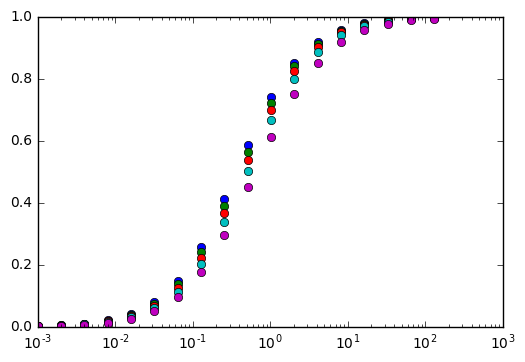

In [28]:
semlog(ligs,datset)

In [37]:
datsetn = np.random.normal(datset,(0.05*datset))

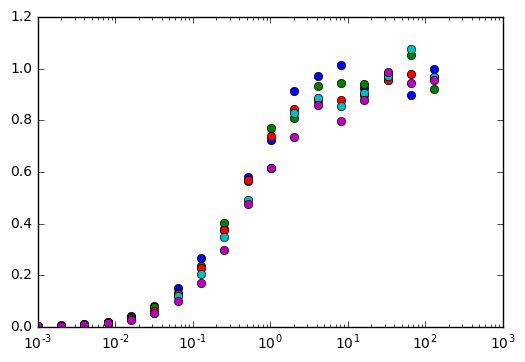

In [38]:
semlog(ligs,datsetn)

In [39]:
avdatesetn = np.mean(np.array([np.array([models.wyman_bestfit(parm,ligs[i],rtot[i]) for i in range(len(ligs))]) for i in range(3)]))

In [45]:
datset = np.array([np.array([models.wyman_bestfit(parm,ligs[i],rtot[i]) for i in range(len(ligs))]) for i in range(3)])

In [46]:
avdatset = datset.mean(axis=0)

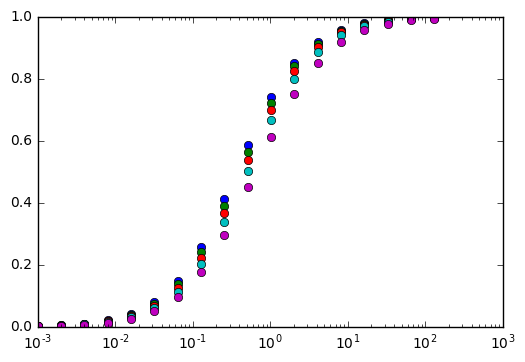

In [47]:
semlog(ligs,avdatset)

In [48]:
avdatset_sds = datset.std(axis=0)

In [51]:
avdatset.shape[0]

5

In [52]:
avdatset[1]

array([ 0.00245828,  0.00490498,  0.00976393,  0.01934623,  0.03798528,
        0.07328746,  0.1368788 ,  0.24163521,  0.39089596,  0.5643122 ,
        0.72336186,  0.84051004,  0.91375548,  0.95506705,  0.97705513,
        0.98840459,  0.99417112,  0.99707771])

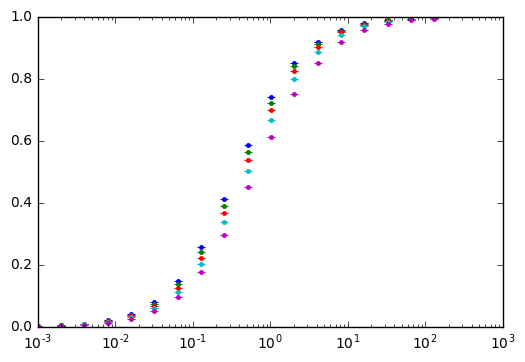

In [54]:
for i in range(avdatset.shape[0]):
    plt.errorbar(ligs[i],avdatset[i],avdatset_sds[i],linestyle='none',fmt='.')
plt.xscale('log')

In [55]:
datset.std(axis=0)

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          3.46944695e-18,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   5.55111512e-17,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.11022302e-16,   0.00000000e+00,
          0.00000000e+00,   1.11022302e-16,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16,   1.11022302e-16,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   5.55111512e-17,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
      

In [56]:
datset = np.array([models.wyman_bestfit(parm,ligs[i],rtot[i]) for i in range(len(ligs))])

In [57]:
datset

array([[ 0.00270114,  0.00538823,  0.01072068,  0.02122155,  0.04158962,
         0.07995809,  0.14838883,  0.25922436,  0.41318706,  0.58652335,
         0.74071453,  0.85171564,  0.92017061,  0.95850362,  0.97883397,
         0.98930956,  0.99462754,  0.99730691],
       [ 0.00245828,  0.00490498,  0.00976393,  0.01934623,  0.03798528,
         0.07328746,  0.1368788 ,  0.24163521,  0.39089596,  0.5643122 ,
         0.72336186,  0.84051004,  0.91375548,  0.95506705,  0.97705513,
         0.98840459,  0.99417112,  0.99707771],
       [ 0.0022312 ,  0.00445269,  0.0088668 ,  0.01758129,  0.03456848,
         0.06687522,  0.12552496,  0.22348911,  0.36624904,  0.53744654,
         0.70032845,  0.82445614,  0.90407663,  0.94972034,  0.97424055,
         0.98695999,  0.99343923,  0.99670934],
       [ 0.00199594,  0.0039838 ,  0.00793546,  0.01574391,  0.03099184,
         0.06009095,  0.11326691,  0.20317096,  0.33694389,  0.50263769,
         0.66730939,  0.79914398,  0.88766661,  0.940

In [59]:
datset_randreps = np.array([np.random.normal(datset,(0.05*datset)) for i in range(3)])

In [60]:
datset_randreps

array([[[ 0.00273116,  0.00517968,  0.01057891,  0.02235376,  0.0399114 ,
          0.08080903,  0.14421019,  0.25629911,  0.45164305,  0.55026018,
          0.73739925,  0.79597679,  0.88819557,  1.04302352,  0.9682845 ,
          1.07478422,  0.94554994,  0.92325693],
        [ 0.00251545,  0.0050808 ,  0.00989605,  0.01847641,  0.03790461,
          0.0736834 ,  0.13190924,  0.25506382,  0.37074118,  0.56752095,
          0.68303477,  0.8416317 ,  0.8825029 ,  0.95018977,  1.03178157,
          1.08411557,  1.01369842,  1.00341408],
        [ 0.00226497,  0.00433734,  0.0092918 ,  0.01661191,  0.03669516,
          0.06532769,  0.12197262,  0.21136636,  0.36823428,  0.52059387,
          0.71937928,  0.88209769,  0.89520167,  1.02383811,  1.11565175,
          0.93836051,  0.97415913,  0.94560681],
        [ 0.00190912,  0.00391266,  0.00778992,  0.01700796,  0.02938341,
          0.06352695,  0.11390358,  0.18752897,  0.33288775,  0.49243644,
          0.69195429,  0.81054607,  0.7

In [61]:
datset_repavg = datset_randreps.mean(axis=0)

In [62]:
datset_repavg

array([[ 0.00261309,  0.00527549,  0.01085397,  0.02231309,  0.0415993 ,
         0.08257389,  0.15280085,  0.25262556,  0.43346327,  0.60581557,
         0.70958244,  0.82759909,  0.87892962,  1.00159462,  0.97905324,
         1.04782353,  0.98453796,  0.94561157],
       [ 0.00239554,  0.0049158 ,  0.01017539,  0.01962341,  0.03766182,
         0.07388829,  0.12931175,  0.25553002,  0.38958185,  0.54988054,
         0.71459946,  0.82104411,  0.90637342,  0.93784891,  1.0083951 ,
         1.04175166,  1.02143166,  0.99449625],
       [ 0.00218442,  0.00430189,  0.00909295,  0.01757904,  0.03477347,
         0.06622102,  0.12463617,  0.21269073,  0.36026735,  0.52850587,
         0.73392662,  0.81425207,  0.93088513,  0.9649411 ,  1.00880212,
         0.99235242,  0.99664081,  1.00636734],
       [ 0.0020258 ,  0.00380355,  0.00762599,  0.01603465,  0.03092526,
         0.05830894,  0.11424745,  0.19773929,  0.32436372,  0.49849806,
         0.64871752,  0.82531965,  0.85566656,  0.921

In [63]:
datset_repsd = datset_randreps.std(axis=0)

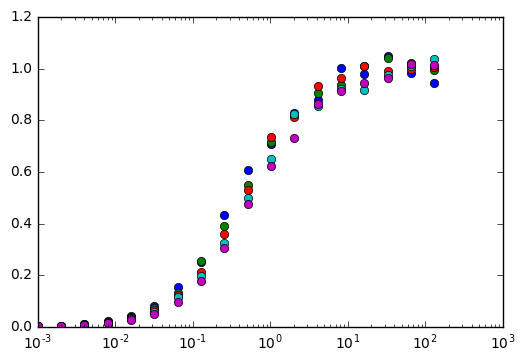

In [64]:
semlog(ligs,datset_repavg)

In [67]:
%autoreload

In [70]:
%autoreload

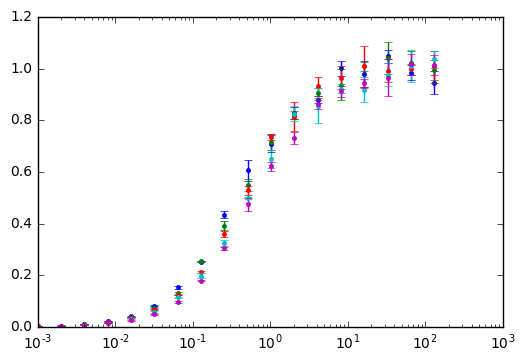

In [71]:
plotter.semlogerr(ligs,datset_repavg,datset_repsd)